## SemEval 2019 Task 4 - Beginning EDA and models

Jonathan Miller and Negar Adyaniyazdi, VCU, CMSC516, Fall 2018

Primarily following code examples here: https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb

Load a data sample, n=1000

In [32]:
import pandas as pd

DATA_PATH = '../data/'
DATA_PROCESSED_PATH = DATA_PATH + 'processed/'

train = pd.read_csv(DATA_PROCESSED_PATH + 'train10000_0.csv')

In [33]:
train.head()

,id,published-at,title,hyperpartisan,bias,url,labeled-by,article_text,preprocessed_text,tokens
0,310969,2008-12-10,Sweden's ailing auto industry,False,left-center,https://pri.org/stories/2008-12-10/swedens-ail...,publisher,Sweden's ailing auto industry SL says a bailou...,sweden ail auto industry sl say bailout swedis...,"['sweden', 'ail', 'auto', 'industry', 'sl', 's..."
1,945112,NaN,Kidnapped Canadian Mining Executive is Now a P...,True,left,http://occupy.com/article/kidnapped-canadian-m...,publisher,Kidnapped Canadian Mining Executive is Now a P...,kidnap canadian mining executive pawn colombia...,"['kidnap', 'canadian', 'mining', 'executive', ..."
2,519393,2017-12-31,Separate car wrecks claim father and son withi...,False,least,https://apnews.com/64fbe3af704a402aa1f1ceb071a...,publisher,Separate car wrecks claim father and son withi...,separate car wreck claim father son within wee...,"['separate', 'car', 'wreck', 'claim', 'father'..."
3,42462,2017-03-09,A GOP Congressman Just Spent 6 Minutes Defendi...,True,left,https://motherjones.com/politics/2017/03/dana-...,publisher,A GOP Congressman Just Spent 6 Minutes Defendi...,gop congressman spend minute defend vladimir p...,"['gop', 'congressman', 'spend', 'minute', 'def..."
4,736303,2017-11-23,No more ?fighting ISIS?? US to stay in Syria t...,False,right-center,https://newsline.com/no-more-fighting-isis-us-...,publisher,No more ?fighting ISIS?? US to stay in Syria t...,no fight isis us stay syria prevent win assad ...,"['no', 'fight', 'isis', 'us', 'stay', 'syria',..."


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = train["preprocessed_text"].tolist()
list_labels = train["hyperpartisan"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.795, precision = 0.795, recall = 0.795, f1 = 0.795


In [37]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

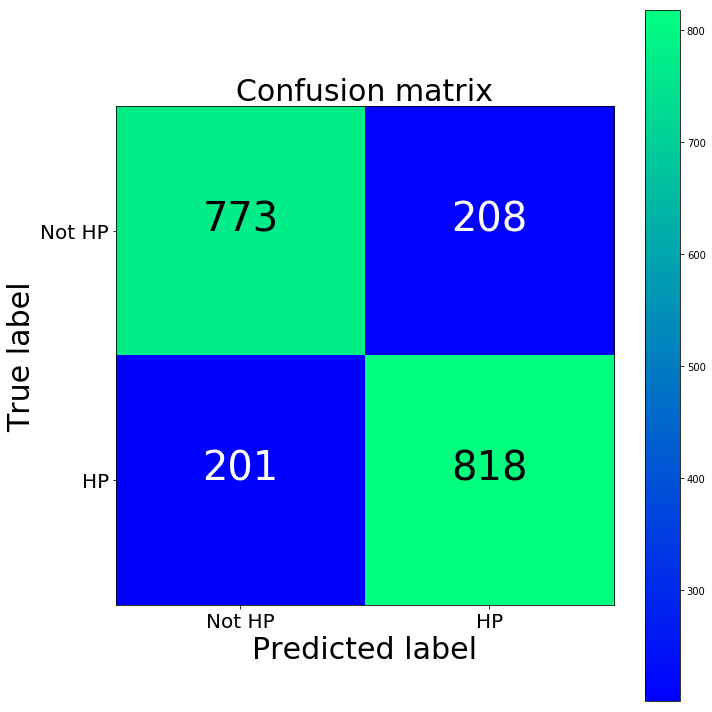

[[773 208]
 [201 818]]


In [76]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Not HP', 'HP'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [45]:
def examine_text_diff(row_num):
    print(train.loc[row_num,'article_text'])
    print('\n')
    print(train.loc[row_num,'preprocessed_text'])

In [54]:
examine_text_diff(8)

?The First Monday in May? Met Gala documentary trailer released (Screenshot courtesy of YouTube) 
?The First Monday in May,? Vogue?s continual foray into documenting behind the scenes of the wild world of fashion, was released this week. 
The documentary follows Editor-in-Chief Anna Wintour,&#160; Director of Special Projects Sylvana Ward Durret and&#160;the Metropolitan Museum of Art?s Costume Institute curator Andrew Bolton as they perfect last year?s Met Ball. 
Wintour and her staff organize the gala for that year?s theme, Chinese Whispers: Tales of the East in Art, Film and Fashion, giving an inside look at how everything comes together. Details are agonized over, the guest list is finalized and there is even a brief crisis over if Rihanna will be coming. 
In the trailer, Wintour is in her full element. When told a certain guest who had decided not to come had changed his mind and wanted to come, Wintour?s patience wears thin. 
?Okay can he not be on his cell phone the entire time 

In [55]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

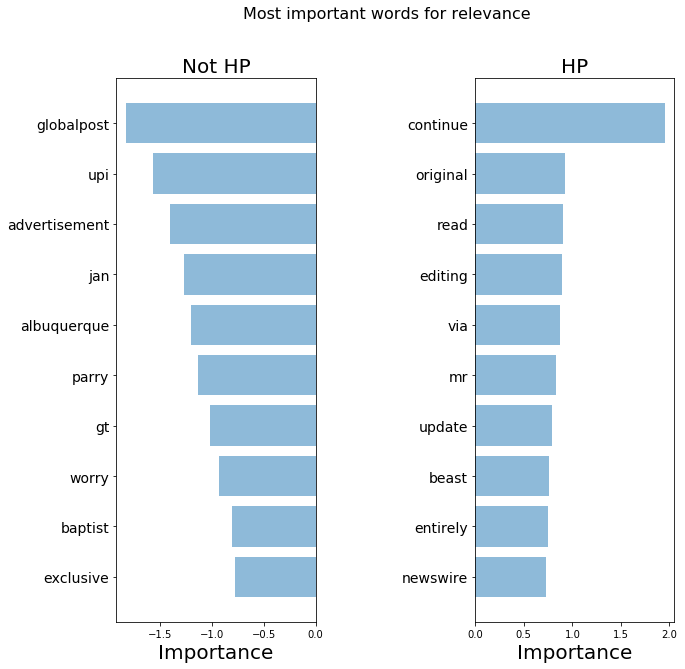

In [77]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Not HP', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('HP', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [69]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

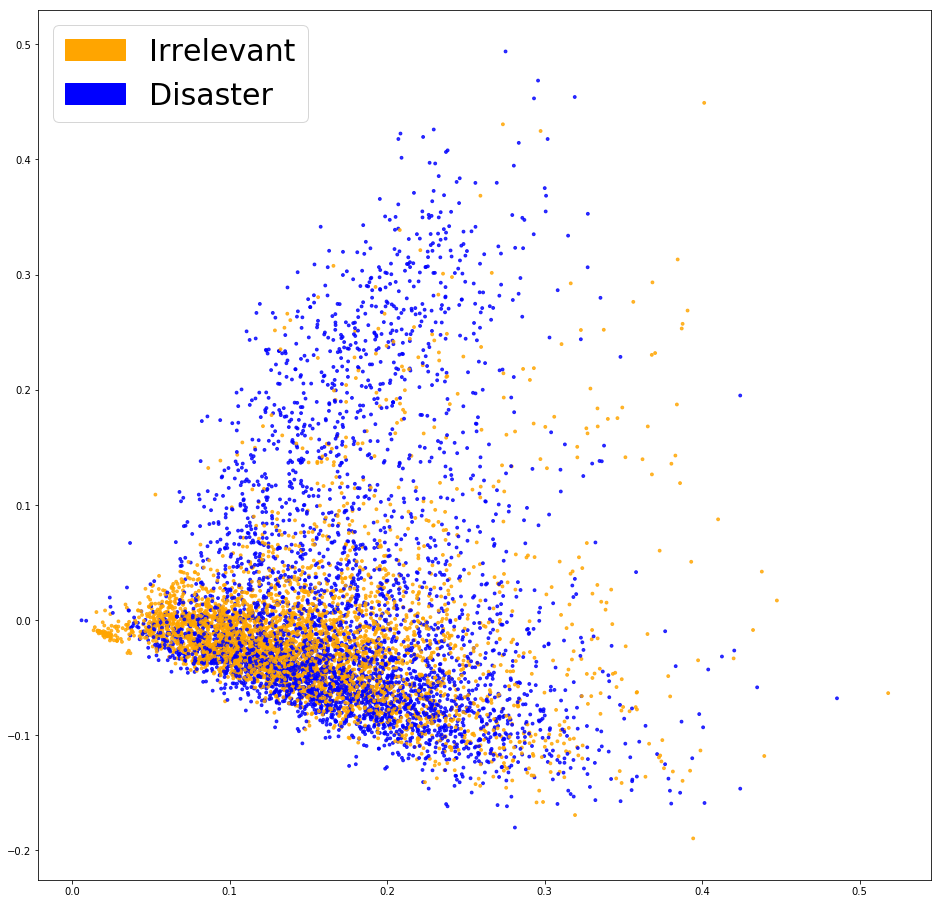

In [70]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [78]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [79]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.812, precision = 0.813, recall = 0.812, f1 = 0.813


In [80]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)


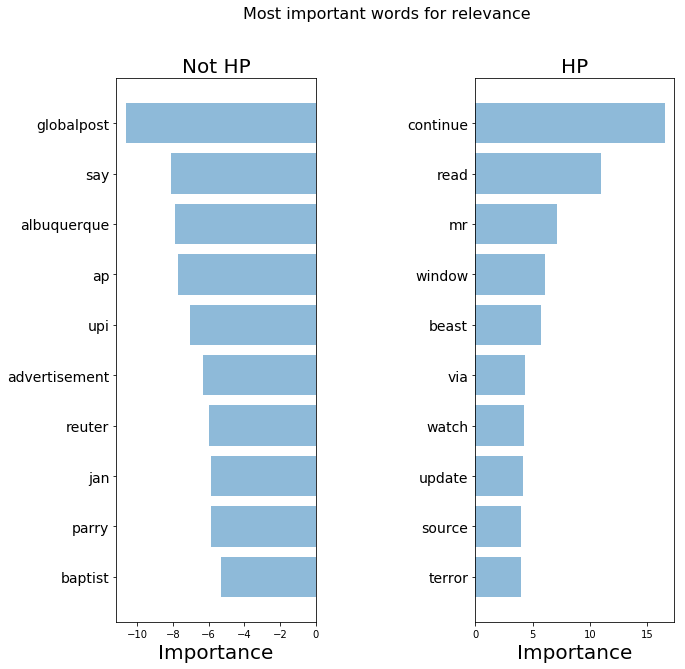

In [83]:
top_scores = [a[0] for a in importance_tfidf[0]['tops']]
top_words = [a[1] for a in importance_tfidf[0]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[0]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [93]:
train[train['preprocessed_text'].str.contains('continue')]['hyperpartisan'].value_counts()

True     2525
False     989
Name: hyperpartisan, dtype: int64

In [119]:
train[(train['preprocessed_text'].str.contains('continue')) 
      & (train['preprocessed_text'].str.contains('read'))]['hyperpartisan'].value_counts()

True     2084
False     472
Name: hyperpartisan, dtype: int64